# matplotlib-challenge
## Observations and Insights 
1. Positive correlation were found between the weight of mice and the tumor size which proves diet is effective agaist cancer.
2. Of the total drug regimens, Capomulin (and Ramicane) seems to be the most effective drug regimen to treat cancer for mice.
3. The result data seems to be consistent overall as there was only one outlier found in Infubinol with final tumor volume(mm3) of 36.32.

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(study_results, mouse_metadata, how="outer", on=["Mouse ID"])
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [81]:
# Checking the number of mice.
total_mice = len(data_df["Mouse ID"].unique())
print(f"Total mice: {total_mice}")

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.  
duplicated_mice = data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
index_df = data_df.loc[duplicated_mice, "Mouse ID"].unique()
print(f"Duplicated mice: {index_df}") 

# Cheking the number of original rows at "1893"
data_df.shape

Total mice: 249
Duplicated mice: ['g989']


(1893, 8)

In [82]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice = data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicated_mice_ID = data_df.loc[duplicated_mice, 'Mouse ID'].unique()
duplicated_mice_ID_data = data_df.loc[data_df["Mouse ID"] == duplicated_mice_ID[0]]
duplicated_mice_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [83]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = data_df.drop(duplicated_mice_ID_data.index)
print(f"Total rows excluding duplicate mice: {len(clean_data_df)}")
# Checking the number of mice in the clean DataFrame.
no_mice_analysis = len(clean_data_df["Mouse ID"].unique())
print(f"Total mice excluding duplicate mice: {no_mice_analysis}")

Total rows excluding duplicate mice: 1880
Total mice excluding duplicate mice: 248


## Summary Statistic

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen_gp = clean_data_df.groupby("Drug Regimen")
mean = drug_regimen_gp["Tumor Volume (mm3)"].mean()
median = drug_regimen_gp["Tumor Volume (mm3)"].median()
var = drug_regimen_gp["Tumor Volume (mm3)"].var()
std = drug_regimen_gp["Tumor Volume (mm3)"].std()
sem = drug_regimen_gp["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_statistics_df = pd.DataFrame({
                                    "Mean": mean,
                                    "Median": median,
                                    "Variance": var,
                                    "Standard deviation": std,
                                    "SEM": sem
                                    })
summary_statistics_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [85]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_table = drug_regimen_gp["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

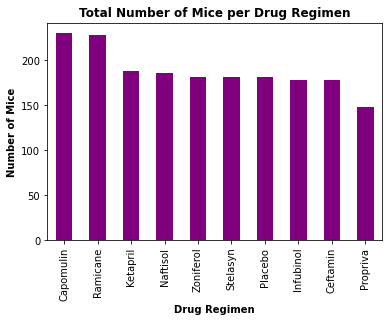

In [86]:
no_mice_per_regimen = drug_regimen_gp["Mouse ID"].count().sort_values(ascending=False)
no_mice_per_regimen
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
pd_bar_mice_per_regimen = no_mice_per_regimen.plot(kind="bar", color="purple", width=0.5)
pd_bar_mice_per_regimen.set_title(label="Total Number of Mice per Drug Regimen", fontweight = "bold")
pd_bar_mice_per_regimen.set_xlabel("Drug Regimen", fontweight = "bold")
pd_bar_mice_per_regimen.set_ylabel("Number of Mice", fontweight = "bold")
#plt.savefig("Images/barplot_pandas.png")
plt.show()
plt.close()

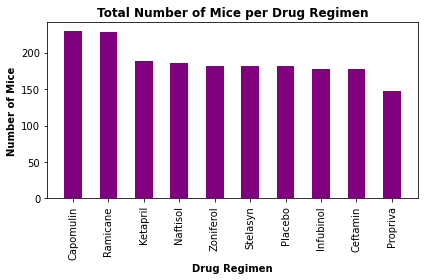

In [87]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis_regimen = np.arange(len(no_mice_per_regimen))
regimen_name = list(no_mice_per_regimen.index.values)
py_bar_mice_per_regimen = plt.bar(x_axis_regimen, no_mice_per_regimen, color="purple", alpha=1.0, width=0.5)
plt.xticks(x_axis_regimen, regimen_name, rotation="vertical")
plt.title("Total Number of Mice per Drug Regimen", fontweight = "bold")
plt.xlabel("Drug Regimen", fontweight = "bold")
plt.ylabel("Number of Mice", fontweight = "bold")
plt.tight_layout()
#plt.savefig("Images/barplot_pyplot.png")
plt.show()
plt.close()

## Pie Charts

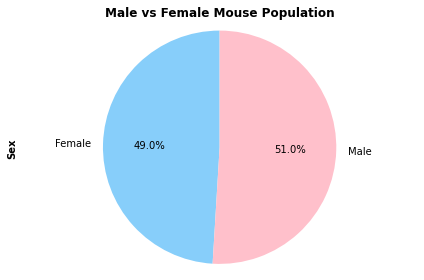

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mice = clean_data_df.groupby("Sex")["Sex"].count()
colors = ["lightskyblue","pink"]
pd_pie_mice_sex = sex_mice.plot(kind="pie", colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis("equal")
pd_pie_mice_sex.set_title(label= "Male vs Female Mouse Population", fontweight = "bold")
pd_pie_mice_sex.set_ylabel("Sex", fontweight = "bold")
plt.tight_layout()
#pd_pie_mice_sex.figure.savefig("Images/piecharts_pandas.png")
plt.show()
plt.close()

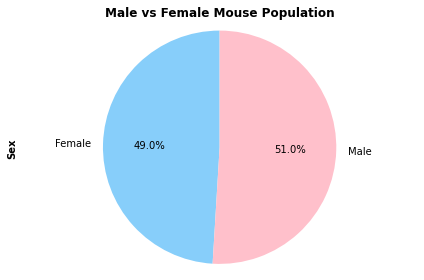

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = sex_mice.index
py_bar_mice_sex = plt.pie(sex_mice, labels=sex_mice.index, autopct="%1.1f%%", colors=colors, startangle=90)
plt.axis("equal")
plt.title("Male vs Female Mouse Population", fontweight = "bold")
plt.ylabel("Sex", fontweight = "bold")
plt.tight_layout()
#plt.savefig("Images/pycharts_pyplot.png")
plt.show()
plt.close()

## Quartiles, Outliers and Boxplots

In [90]:
# # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# created a panda series by groupby of mouse id and the looking at the max timepoints of each mouse id

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# merging "on" Mouse ID and Timepoint, "how" on RIGHT so that it only records the MAX timepoints

final_tumor_vol = clean_data_df.groupby(["Drug Regimen", "Mouse ID"]).last()[["Timepoint", "Tumor Volume (mm3)"]]
final_tumor_df = final_tumor_vol.reset_index()

In [91]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset
    final_tumor_vol_list.append(final_tumor_vol)
    
    # Calculate the IQR and quantitatively
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

    # Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for {drug} is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f"Outlier final tumor volume(mm3) is {round(outliers[i], 2)}")
    print("-------------------------------------------------------------------")

Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
-------------------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Ramicane is: 0
-------------------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Infubinol is: 1
Outlier final tumor volume(mm3) is 36.32
-------------------------------------------------------------------
Ceftamin Regimen
Final tum

## Box Plot

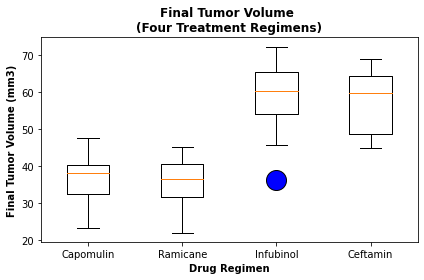

In [97]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={"markerfacecolor":"b","markersize": 10})
final_tumor_plot.set_title("Final Tumor Volume \n(Four Treatment Regimens)", fontweight="bold")
final_tumor_plot.set_xlabel("Drug Regimen", fontweight="bold")
final_tumor_plot.set_ylabel("Final Tumor Volume (mm3)", fontweight="bold")
plt.tight_layout()
#final_tumor_plot.figure.savefig("Images/boxplot.png")
plt.show()
plt.close()

## Line Plot

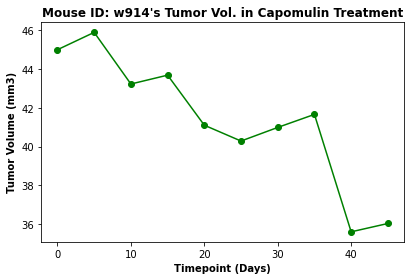

In [101]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin"]
#mouse_id = "l509"
mouse_id = "w914"
mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == mouse_id]
time_vol = plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"], marker="o", color="green")
plt.title(f"Mouse ID: {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight="bold")
plt.xlabel("Timepoint (Days)", fontweight="bold")
plt.ylabel("Tumor Volume (mm3)", fontweight="bold")
plt.tight_layout()
#plt.savefig('Images/lineplot.png")
plt.show()
plt.close()

## Scatter Plot

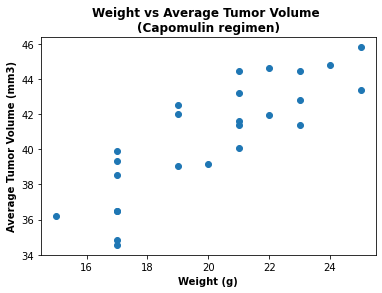

In [94]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_gp = Capomulin_df.groupby("Mouse ID").mean()
mice_weight_avg = Capomulin_gp["Weight (g)"]
mice_tumor_avg = Capomulin_gp["Tumor Volume (mm3)"]

plt.scatter(mice_weight_avg, mice_tumor_avg)
plt.title("Weight vs Average Tumor Volume \n(Capomulin regimen)", fontweight="bold")
plt.xlabel("Weight (g)", fontweight="bold")
plt.ylabel("Average Tumor Volume (mm3)", fontweight="bold")
#plt.savefig("Images/scatterplot.png")
plt.show()
plt.close()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84
The r-squared of linear regression is: 0.71


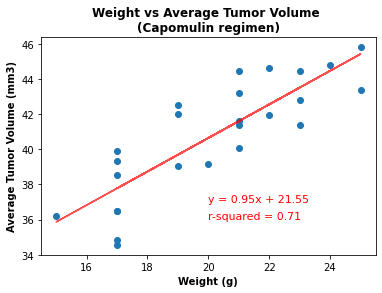

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mice_weight_avg
y_values = mice_tumor_avg
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_squared = round(rvalue**2,2)
print(f"The r-squared of linear regression is: {r_squared}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color="r", alpha=0.7)
plt.annotate(line_eq,(20,37), fontsize=11, color="red")
plt.annotate(f"r-squared = {r_squared}", (20,36), fontsize=11, color="red")
plt.title("Weight vs Average Tumor Volume \n(Capomulin regimen)", fontweight="bold")
plt.xlabel("Weight (g)", fontweight="bold")
plt.ylabel("Average Tumor Volume (mm3)", fontweight="bold")
#plt.savefig('Images/scatter_weight_tumor_linear.png')
plt.show()
plt.close()